# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 622


In [19]:
# used for debugging loop with one api request


# # citee = "jamestown"
# units = "metric"

# citee_data = []

# # Build partial query URL
# # url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric&q={citee}"
# urle = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={units}"
# citee_urle = f"{urle}&q={city}"

# weather_data1 = requests.get(citee_urle).json()
# citee_weather = weather_data1['weather'][0]['description']

# # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
# citee_lat = weather_data1['coord']['lat']
# citee_lng = weather_data1['coord']['lon']
# citee_max_temp = weather_data1['main']['temp_max']
# citee_humidity = weather_data1['main']['humidity']
# citee_clouds = weather_data1['clouds']['all']
# citee_wind = weather_data1['wind']['speed']
# citee_country = weather_data1['sys']['country']
# citee_date = weather_data1['dt']

# # Append the City information into city_data list
# citee_data.append({"City": citee, 
#                     "Lat": citee_lat, 
#                     "Lng": citee_lng, 
#                     "Max Temp": citee_max_temp,
#                     "Humidity": citee_humidity,
#                     "Cloudiness": citee_clouds,
#                     "Wind Speed": citee_wind,
#                     "Country": citee_country,
#                     "Date": citee_date})

# citee_data_df = pd.json_normalize(citee_data)
# citee_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,jamestown,42.097,-79.2353,0.77,61,100,5.14,US,1670133992


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [20]:
# setting units
units = "metric"

# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={units}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    weather_data = requests.get(city_url).json()

    # normalizing JSON, converting to dataframe
    # city_data =pd.json_normalize(weather_data)
    
    try:
        # Parse the JSON and retrieve data
        city_weather = weather_data['weather'][0]['description']

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = weather_data['coord']['lat']
        city_lng = weather_data['coord']['lon']
        city_max_temp = weather_data['main']['temp_max']
        city_humidity = weather_data['main']['humidity']
        city_clouds = weather_data['clouds']['all']
        city_wind = weather_data['wind']['speed']
        city_country = weather_data['sys']['country']
        city_date = weather_data['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass


# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | bredasdorp
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | pangai
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | kapaa
Processing Record 7 of Set 1 | tasiilaq
Processing Record 8 of Set 1 | jamestown
Processing Record 9 of Set 1 | namatanai
Processing Record 10 of Set 1 | pacific grove
Processing Record 11 of Set 1 | opuwo
Processing Record 12 of Set 1 | olinda
Processing Record 13 of Set 1 | dublin
Processing Record 14 of Set 1 | san juan
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | mandalgovi
Processing Record 17 of Set 1 | atar
Processing Record 18 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 19 of Set 1 | utiroa
City not found. Skipping...
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | taolanaro
City not found. Skipping...
Pro

In [21]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.json_normalize(city_data)

# Show Record Count
city_data_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


In [23]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [2]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,busselton,-33.6500,115.3333,24.43,44,44,6.14,AU,1670133626
1,bredasdorp,-34.5322,20.0403,17.12,53,6,1.09,ZA,1670134070
2,punta arenas,-53.1500,-70.9167,5.06,75,40,5.66,CL,1670134070
3,pangai,-19.8000,-174.3500,27.32,79,100,5.08,TO,1670134071
4,mataura,-46.1927,168.8643,10.27,92,100,3.03,NZ,1670134071


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

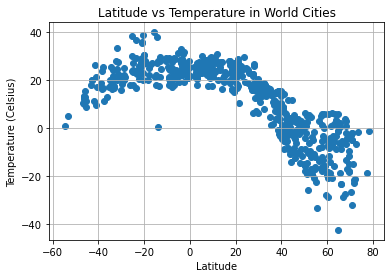

In [3]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs Temperature in World Cities")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

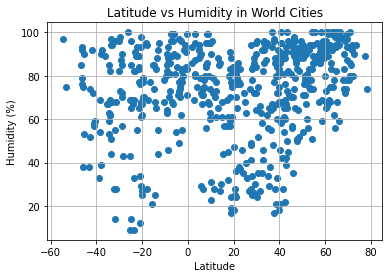

In [4]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs Humidity in World Cities")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

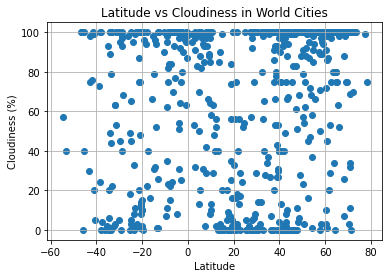

In [5]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs Cloudiness in World Cities")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

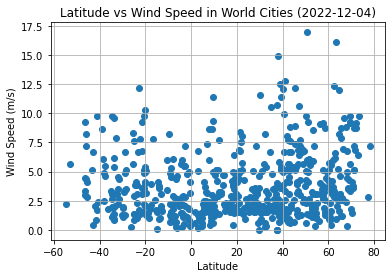

In [6]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs Wind Speed in World Cities (2022-12-04)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [7]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] > 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,kapaa,22.0752,-159.3190,25.99,86,40,5.14,US,1670133942
6,tasiilaq,65.6145,-37.6368,2.09,97,100,2.59,GL,1670134072
7,jamestown,42.0970,-79.2353,0.77,61,100,5.14,US,1670133992
9,pacific grove,36.6177,-121.9166,11.68,93,100,2.24,US,1670134072
12,dublin,37.7021,-121.9358,10.30,96,100,0.00,US,1670134073


In [8]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,busselton,-33.6500,115.3333,24.43,44,44,6.14,AU,1670133626
1,bredasdorp,-34.5322,20.0403,17.12,53,6,1.09,ZA,1670134070
2,punta arenas,-53.1500,-70.9167,5.06,75,40,5.66,CL,1670134070
3,pangai,-19.8000,-174.3500,27.32,79,100,5.08,TO,1670134071
4,mataura,-46.1927,168.8643,10.27,92,100,3.03,NZ,1670134071


In [39]:
# Define a function to create Linear Regression plots


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8541963478333425


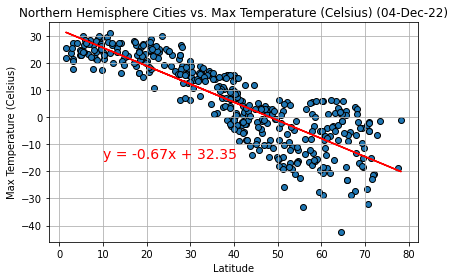

In [9]:
# Linear regression on Northern Hemisphere

# Use linregress() from SciPy to get line of regression to plot onto the chart
(slopen1, yintn1, rvaln1, pvaln1, sterrn1) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])

# Find y-values of regression line 
regress_val_n = (northern_hemi_df["Lat"] * slopen1) + yintn1

# Equation of regression line for annotation
line_eq_n1 = f"y = {round(slopen1, 2)}x + {round(yintn1, 2)}"

# Display r-value
print(f"The r-value is: {rvaln1}")

# Configure scatter plot
plt.scatter(
    northern_hemi_df["Lat"], 
    northern_hemi_df["Max Temp"], 
    edgecolors="black"
)

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (Celsius)")
plt.title("Northern Hemisphere Cities vs. Max Temperature (Celsius) (04-Dec-22)")

# Plot regression line
plt.plot(northern_hemi_df["Lat"], regress_val_n, color="r")

# Annotate with regression line
plt.annotate(line_eq_n1, (10, -15), fontsize=14, color="r")

# Grid, tight layout, savefig, and show
plt.grid()
plt.tight_layout()
plt.savefig("output_data/north_temp.png")
plt.show()


The r-value is: 0.5087521767314469


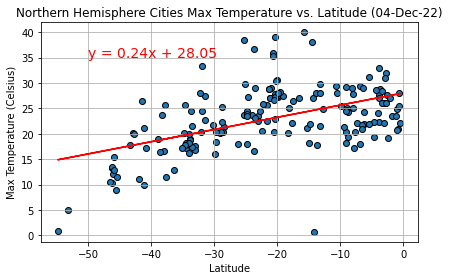

In [10]:
# Linear regression on Southern Hemisphere

# Use linregress() from SciPy to get line of regression to plot onto the chart
(slopes1, yints1, rvals1, pvals1, sterrs1) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])

# Find y-values of regression line 
regress_val_s1 = (southern_hemi_df["Lat"] * slopes1) + yints1

# Equation of regression line for annotation
line_eq_s1 = f"y = {round(slopes1, 2)}x + {round(yints1, 2)}"

# Display r-value
print(f"The r-value is: {rvals1}")

# Configure scatter plot
plt.scatter(
    southern_hemi_df["Lat"], 
    southern_hemi_df["Max Temp"], 
    edgecolors="black"
)

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (Celsius)")
plt.title("Northern Hemisphere Cities Max Temperature vs. Latitude (04-Dec-22)")

# Plot regression line
plt.plot(southern_hemi_df["Lat"], regress_val_s1, color="r")

# Annotate with regression line
plt.annotate(line_eq_s1, (-50,35), fontsize=14, color="r")

# Grid, tight layout, savefig, and show
plt.grid()
plt.tight_layout()
plt.savefig("output_data/south_temp.png")
plt.show()


**Discussion about the linear relationship:** A few observations may be made:

1)  The further you get from the Equator (0 Latitude), the cooler the temperatures.  it is more noticeable in the northern hemisphere, as there are significantly more cities north of 50 degrees N latitude than there are cities south of 50 degrees S latitude.  

If more cities and weather stations further south were included, the linear regression of the southern hamisphere would more closely resemble the inverse of the northern hemisphere.

2) Using the data as it was presented here, the slopes are inverted north to south.  A more representative way of presenting this might be to take the absolute value of the negative latitudes, and present it like that.  Higher latitudes represent increased distance from the equator, so while they are the inverse of each other, it's merely anecdotal.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.3074559978198792


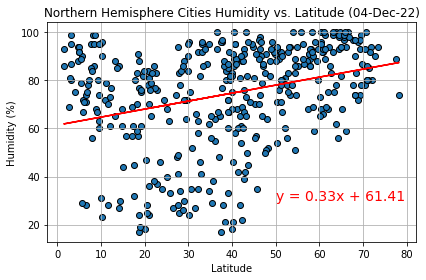

In [11]:
# Northern Hemisphere


# Use linregress() from SciPy to get line of regression to plot onto the chart
(slopen2, yintn2, rvaln2, pvaln2, sterrn2) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])

# Find y-values of regression line 
regress_val_n2 = (northern_hemi_df["Lat"] * slopen2) + yintn2

# Equation of regression line for annotation
line_eq_n2 = f"y = {round(slopen2, 2)}x + {round(yintn2, 2)}"

# Display r-value
print(f"The r-value is: {rvaln2}")

# Configure scatter plot
plt.scatter(
    northern_hemi_df["Lat"], 
    northern_hemi_df["Humidity"], 
    edgecolors="black"
)

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere Cities Humidity vs. Latitude (04-Dec-22)")

# Plot regression line
plt.plot(northern_hemi_df["Lat"], regress_val_n2, color="r")

# Annotate with regression line
plt.annotate(line_eq_n2, (50, 30), fontsize=14, color="r")

# Grid, tight layout, savefig, and show
plt.grid()
plt.tight_layout()
plt.savefig("output_data/north_hum.png")
plt.show()

The r-value is: 0.1827153016094963


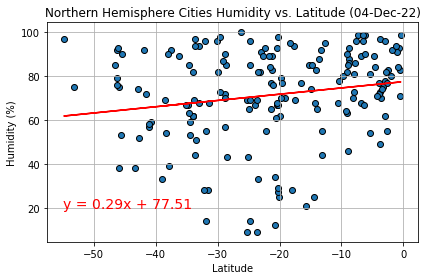

In [12]:
# Southern Hemisphere

# Use linregress() from SciPy to get line of regression to plot onto the chart
(slopes2, yints2, rvals2, pvals2, sterrs2) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])

# Find y-values of regression line 
regress_val_s2 = (southern_hemi_df["Lat"] * slopes2) + yints2

# Equation of regression line for annotation
line_eq_s2 = f"y = {round(slopes2, 2)}x + {round(yints2, 2)}"

# Display r-value
print(f"The r-value is: {rvals2}")

# Configure scatter plot
plt.scatter(
    southern_hemi_df["Lat"], 
    southern_hemi_df["Humidity"], 
    edgecolors="black"
)

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere Cities Humidity vs. Latitude (04-Dec-22)")

# Plot regression line
plt.plot(southern_hemi_df["Lat"], regress_val_s2, color="r")

# Annotate with regression line
plt.annotate(line_eq_s2, (-55, 20), fontsize=14, color="r")

# Grid, tight layout, savefig, and show
plt.grid()
plt.tight_layout()
plt.savefig("output_data/south_hum.png")
plt.show()

**Discussion about the linear relationship:** There MAY be some instance of increased humidity in the higher latitudes.  There is a distince LACK of dry climates north and south of 45-50 degrees latitude.  That may be caused by the higher latitudes, but it may also be due to other environmental and geological factors such as: at the further latitudes, there are more coastlines, while near the equator the landmasses tend to be landlocked.

(0 degrees to 40 degrees north latitude, between africa to southeast asia has very little water and contains large masses of land).

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.2310966081460302


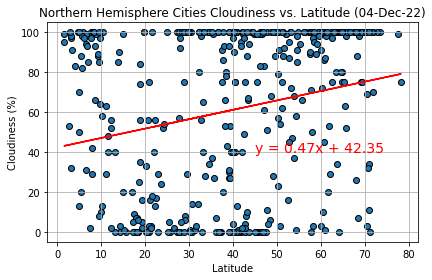

In [13]:
# Northern Hemisphere

# Use linregress() from SciPy to get line of regression to plot onto the chart
(slopen3, yintn3, rvaln3, pvaln3, sterrn3) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])

# Find y-values of regression line 
regress_val_n3 = (northern_hemi_df["Lat"] * slopen3) + yintn3

# Equation of regression line for annotation
line_eq_n3 = f"y = {round(slopen3, 2)}x + {round(yintn3, 2)}"

# Display r-value
print(f"The r-value is: {rvaln3}")

# Configure scatter plot
plt.scatter(
    northern_hemi_df["Lat"], 
    northern_hemi_df["Cloudiness"], 
    edgecolors="black"
)

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere Cities Cloudiness vs. Latitude (04-Dec-22)")

# Plot regression line
plt.plot(northern_hemi_df["Lat"], regress_val_n3, color="r")

# Annotate with regression line
plt.annotate(line_eq_n3, (45, 40), fontsize=14, color="r")

# Grid, tight layout, savefig, and show
plt.grid()
plt.tight_layout()
plt.savefig("output_data/north_cloud.png")
plt.show()

The r-value is: 0.17731622706265188


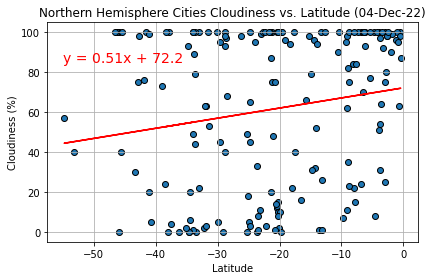

In [14]:
# Southern Hemisphere

# Use linregress() from SciPy to get line of regression to plot onto the chart
(slopes3, yints3, rvals3, pvals3, sterrs3) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])

# Find y-values of regression line 
regress_val_s3 = (southern_hemi_df["Lat"] * slopes3) + yints3

# Equation of regression line for annotation
line_eq_s3 = f"y = {round(slopes3, 2)}x + {round(yints3, 2)}"

# Display r-value
print(f"The r-value is: {rvals3}")

# Configure scatter plot
plt.scatter(
    southern_hemi_df["Lat"], 
    southern_hemi_df["Cloudiness"], 
    edgecolors="black"
)

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere Cities Cloudiness vs. Latitude (04-Dec-22)")

# Plot regression line
plt.plot(southern_hemi_df["Lat"], regress_val_s3, color="r")

# Annotate with regression line
plt.annotate(line_eq_s3, (-55,85), fontsize=14, color="r")

# Grid, tight layout, savefig, and show
plt.grid()
plt.tight_layout()
plt.savefig("output_data/south_cloud.png")
plt.show()

**Discussion about the linear relationship:** there does not seem to be any trends or clear relationship between latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.21910669990103537


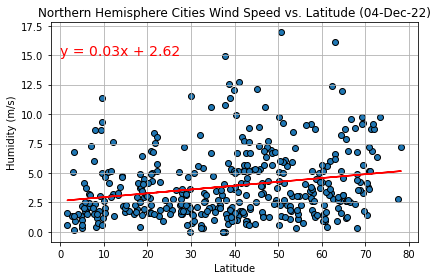

In [15]:
# Northern Hemisphere

# Use linregress() from SciPy to get line of regression to plot onto the chart
(slopen4, yintn4, rvaln4, pvaln4, sterrn4) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])

# Find y-values of regression line 
regress_val_n4 = (northern_hemi_df["Lat"] * slopen4) + yintn4

# Equation of regression line for annotation
line_eq_n4 = f"y = {round(slopen4, 2)}x + {round(yintn4, 2)}"

# Display r-value
print(f"The r-value is: {rvaln4}")

# Configure scatter plot
plt.scatter(
    northern_hemi_df["Lat"], 
    northern_hemi_df["Wind Speed"], 
    edgecolors="black"
)

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Humidity (m/s)")
plt.title("Northern Hemisphere Cities Wind Speed vs. Latitude (04-Dec-22)")

# Plot regression line
plt.plot(northern_hemi_df["Lat"], regress_val_n4, color="r")

# Annotate with regression line
plt.annotate(line_eq_n4, (0, 15), fontsize=14, color="r")

# Grid, tight layout, savefig, and show
plt.grid()
plt.tight_layout()
plt.savefig("output_data/north_wind.png")
plt.show()

The r-value is: -0.23416820833314797


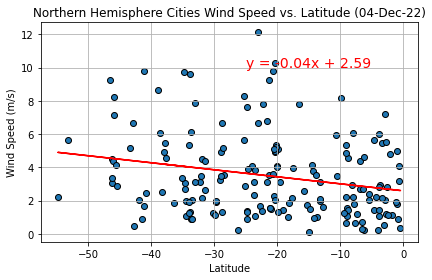

In [16]:
# Southern Hemisphere

# Use linregress() from SciPy to get line of regression to plot onto the chart
(slopes4, yints4, rvals4, pvals4, sterrs4) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])

# Find y-values of regression line 
regress_val_s4 = (southern_hemi_df["Lat"] * slopes4) + yints4

# Equation of regression line for annotation
line_eq_s4 = f"y = {round(slopes4, 2)}x + {round(yints4, 2)}"

# Display r-value
print(f"The r-value is: {rvals4}")

# Configure scatter plot
plt.scatter(
    southern_hemi_df["Lat"], 
    southern_hemi_df["Wind Speed"], 
    edgecolors="black"
)

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("Northern Hemisphere Cities Wind Speed vs. Latitude (04-Dec-22)")

# Plot regression line
plt.plot(southern_hemi_df["Lat"], regress_val_s4, color="r")

# Annotate with regression line
plt.annotate(line_eq_s4, (-25, 10), fontsize=14, color="r")

# Grid, tight layout, savefig, and show
plt.grid()
plt.tight_layout()
plt.savefig("output_data/south_wind.png")
plt.show()

**Discussion about the linear relationship:** There does not seem to be any relationship between wind speed and latitude.  This is further supported by the well documented trade wind patterns that have been well documented around the globe.  They are predictable and necessary to equalize temperatures and pressures in the atmosphere, and utlilize countercurrents with boundaries. (from wikipedia:  boundaries at 0, 30 N and S, and 60 N and S latitudes).